In [72]:
import pandas as pd
from extract_dataframe import read_json
from extract_dataframe import TweetDfExtractor
from clean_tweets_dataframe import Clean_Tweets

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
import pandas as pd
import statistics
import string




class Explore_Data:
    def __init__(self, df:pd.DataFrame):
        self.df = df
    def generate_word_cloud(self)->None:
        data=self.df.loc[self.df['lang'] =="en"]
        data['clean_text']=data['clean_text'].astype(str)
        data['clean_text'] = data['clean_text'].apply(lambda x: x.lower())
        data['clean_text']= data['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
        plt.figure(figsize=(20, 10))
        plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(data.clean_text.values)))
        plt.axis('off')
        plt.title('Most Frequent Words In Our Tweets',fontsize=16)
        plt.show()
        return
    def generate_lang_chart(self)->None:
        tweets_by_lang = self.df['lang'].value_counts()
        fig, ax = plt.subplots()
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.set_xlabel('Languages', fontsize=10)
        ax.set_ylabel('Number of tweets' , fontsize=10)
        ax.set_title('Top 5 languages', fontsize=10)
        tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')
    def generate_sentiment_bar_chart(self)->None:
        return
        
    def generate_hashtag_chart(self)->None:
        data=self.df
        hashtags_list_df = data.loc[
        data.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]
        flattened_hashtags_df = pd.DataFrame(
            [hashtag for hashtags_list in hashtags_list_df.hashtags
            for hashtag in hashtags_list],
            columns=['hashtag'])
        # To plot Top 20 Hashtags
        data["flattened_hashtags"]= flattened_hashtags_df
        data['flattened_hashtags'].value_counts()[:20].plot(kind='bar')
        
    def generate_retweet_chart(self)->None:
        data=self.df
        tweets_by_retweet = self.df['retweet_count'].value_counts()
        fig, ax = plt.subplots()
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.set_xlabel('Tweets', fontsize=10)
        ax.set_ylabel('Number of retweets' , fontsize=10)
        ax.set_title('Distribution of retweets', fontsize=10)
        tweets_by_retweet[0:30].plot(ax=ax, kind='bar', color='orange')
        return


In [73]:
_, tweet_list = read_json("data/covid19.json")
tweet = TweetDfExtractor(tweet_list)
tweet_df = tweet.get_tweet_df() 
clean_tweets=Clean_Tweets(tweet_df)
# tweet_df=clean_tweets.remove_null(tweet_df)
clean_df= clean_tweets.clean_hashtags(tweet_df)
clean_df= clean_tweets.remove_mentions_from_frame(clean_df)  
clean_df= clean_tweets.remove_hastags_from_tweet(clean_df)
listed= clean_tweets.convert_to_lists(clean_df)

# listed.head(5)["hashtags"]

explore=Explore_Data(listed)




Automation in Action...!!!


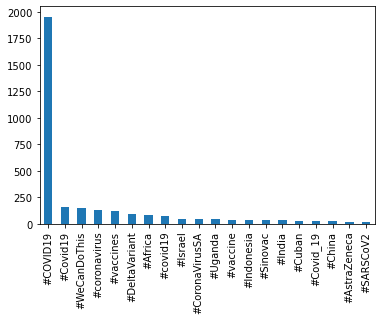

In [59]:
explore.generate_hashtag_chart()

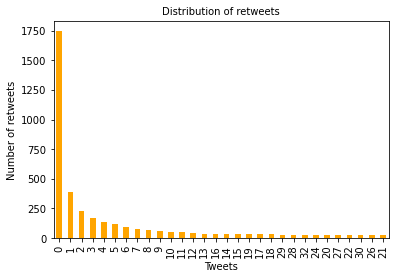

In [74]:
explore.generate_retweet_chart()

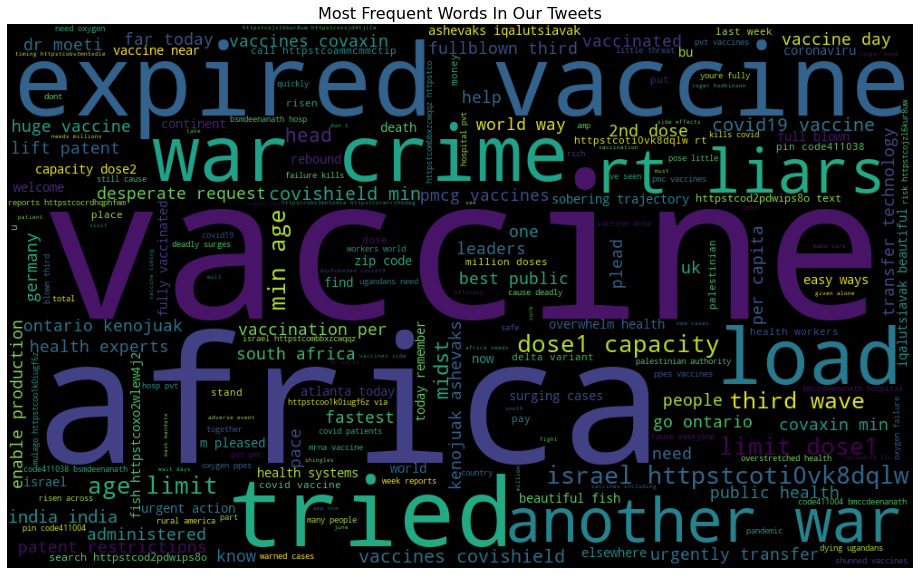

In [75]:
explore.generate_word_cloud()